In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [21]:
df = pd.read_csv('../DataSets/50_Startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [22]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

so we have profit as dependent variable. among 4 inde vars we have 3 as already numereical while State is categorical data.so we will first standardize the numerical data.and then we need to one hot encode state column.


In [23]:
from sklearn.preprocessing import StandardScaler
sc_rnd = StandardScaler()
sc_admin = StandardScaler()
sc_market = StandardScaler()
sc_profit = StandardScaler()

df['R&D Spend'] = sc_rnd.fit_transform(df[['R&D Spend']])
df['Administration'] = sc_admin.fit_transform(df[['Administration']])
df['Marketing Spend'] = sc_market.fit_transform(df[['Marketing Spend']])
df['Profit'] = sc_profit.fit_transform(df[['Profit']])

X = df[['R&D Spend', 'Administration', 'Marketing Spend']]
y = df[['Profit']]
df


,R&D Spend,Administration,Marketing Spend,State,Profit
0,2.016411,0.560753,2.153943,New York,2.011203
1,1.955860,1.082807,1.923600,California,1.999430
2,1.754364,-0.728257,1.626528,Florida,1.980842
3,1.554784,-0.096365,1.422210,New York,1.776627
4,1.504937,-1.079919,1.281528,Florida,1.357740
5,1.279800,-0.776239,1.254210,New York,1.127250
6,1.340066,0.932147,-0.688150,California,1.105481
7,1.245057,0.871980,0.932186,Florida,1.096210
8,1.030369,0.986952,0.830887,New York,1.007470
9,1.091819,-0.456640,0.776107,California,0.946022


In [24]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
df = pd.get_dummies(df, columns=['State'], dtype=int)
df

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,2.016411,0.560753,2.153943,2.011203,0,0,1
1,1.955860,1.082807,1.923600,1.999430,1,0,0
2,1.754364,-0.728257,1.626528,1.980842,0,1,0
3,1.554784,-0.096365,1.422210,1.776627,0,0,1
4,1.504937,-1.079919,1.281528,1.357740,0,1,0
5,1.279800,-0.776239,1.254210,1.127250,0,0,1
6,1.340066,0.932147,-0.688150,1.105481,1,0,0
7,1.245057,0.871980,0.932186,1.096210,0,1,0
8,1.030369,0.986952,0.830887,1.007470,0,0,1
9,1.091819,-0.456640,0.776107,0.946022,1,0,0


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [27]:
y_pred = model.predict(X_test)

In [28]:
from sklearn.metrics import r2_score, mean_squared_error

print(model.intercept_)
print(model.coef_[0])

print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

[-0.00839445]
[ 0.91537531 -0.04721922  0.0947879 ]
0.9000653083037321
0.050830038129317655


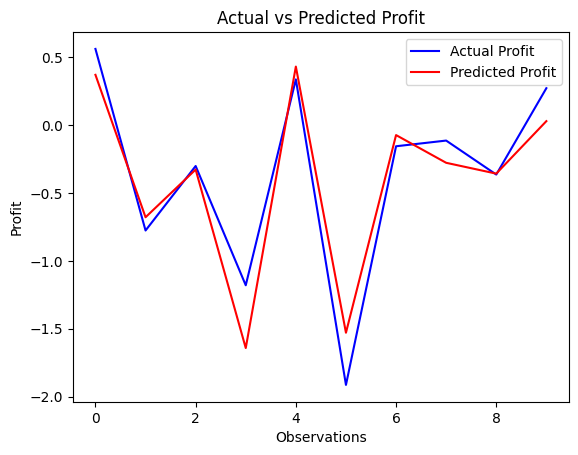

In [30]:
#plot for showing comparison between actual and predicted values
plt.plot(y_test.values, color='blue', label='Actual Profit')
plt.plot(y_pred, color='red', label='Predicted Profit')
plt.xlabel("Observations")
plt.ylabel("Profit")
plt.title("Actual vs Predicted Profit")
plt.legend()
plt.show()